<h1><strong>Data Report</strong></h1>
<h3>Brandon Myers</h3>
<h3>9 / 12 / 24</h3>

Who or what is the source of your personal Instagram data? (you downloaded the data, but did you create it?)</br>
<strong>The source of my data is Instagram, which is generated when I use their services. </strong></br>
Why was this data created and what purposes can the data serve?</br>
<strong>This data is created as a result of me using the instagram platform. It can serve the purpose of revealing usage statistics as well as the extent of data collection and personal information being stored.</strong></br>
In what ways may this data be reliable?</br>
<strong>It's factual.</strong></br>
In what ways may this data be unreliable?</br>
<strong>It could be missing required context to get a full picture of certain data sets</strong>

I start by importing the libraries I'm going to use, then loading the json file for liked posts

In [327]:
import datetime
import json
import pandas as pd

with open("instagram_data/your_instagram_activity/likes/liked_posts.json") as j:
    likes = json.load(j) 

Then I grab the keys for this file

In [330]:
likes.keys()

dict_keys(['likes_media_likes'])

I use this key to make a dataframe of the json file.

In [333]:
likes_df = pd.DataFrame(likes['likes_media_likes'])

I need to get individual elements of string_list_data, so I figure out how to reach them

In [334]:
likes_df['string_list_data'].iloc[0][0]['timestamp']

1726163856

Now that I'm modifying the dataframe and cleaning it up, I'll make a new one called <em>tidy_df.</em> I add a new row for each one, reformatting how I just got the timestamp into a loop. I'll also go ahead and convert the timestamp to human time

In [370]:
tidy_df = likes_df
tidy_df['href'] = [x[0]['href'] for x in likes_df['string_list_data']]
tidy_df['value'] = [x[0]['value'] for x in likes_df['string_list_data']]
tidy_df['timestamp'] = [datetime.datetime.fromtimestamp(x[0]['timestamp']).strftime('%Y-%m-%d  %H:%M') for x in likes_df['string_list_data']]
tidy_df.head()

,title,string_list_data,href,value,timestamp
0,ericdoa,[{'href': 'https://www.instagram.com/reel/C_0y...,https://www.instagram.com/reel/C_0yBgaOxIq/,ð,2024-09-12 13:57
1,nisheink,[{'href': 'https://www.instagram.com/reel/C_gS...,https://www.instagram.com/reel/C_gSccNiB68/,ð,2024-09-11 14:39
2,owenkcat,[{'href': 'https://www.instagram.com/p/C_wsEQP...,https://www.instagram.com/p/C_wsEQPxRfQ/,ð,2024-09-11 13:49
3,esportsksu,[{'href': 'https://www.instagram.com/p/C_wxeLn...,https://www.instagram.com/p/C_wxeLnNPwf/,ð,2024-09-11 08:18
4,esportsksu,[{'href': 'https://www.instagram.com/p/C_vi11t...,https://www.instagram.com/p/C_vi11tNS-L/,ð,2024-09-10 15:02


Now I can get rid of the string_list_data column

In [353]:

#tidy_df = tidy_df.drop(columns = ['string_list_data'])
tidy_df.head()

,title,href,value,timestamp
0,ericdoa,https://www.instagram.com/reel/C_0yBgaOxIq/,ð,2024-09-12 01:57
1,nisheink,https://www.instagram.com/reel/C_gSccNiB68/,ð,2024-09-11 02:39
2,owenkcat,https://www.instagram.com/p/C_wsEQPxRfQ/,ð,2024-09-11 01:49
3,esportsksu,https://www.instagram.com/p/C_wxeLnNPwf/,ð,2024-09-11 08:18
4,esportsksu,https://www.instagram.com/p/C_vi11tNS-L/,ð,2024-09-10 03:02


Here I sort the dataframe by title (account), where accounts with more likes ranking higher.

In [357]:
likes_df.groupby('title').count().sort_values('timestamp', ascending = False).head(20)

,string_list_data,href,value,timestamp
title,,,,
largetrap,52,52,52,52
c4ble.1,38,38,38,38
monkey.posting,34,34,34,34
needless.mp3,19,19,19,19
xandillionaire_grindset,18,18,18,18
uncrustable.memess,16,16,16,16
brbadbrgood,15,15,15,15
opiux.animals,12,12,12,12
owenkcat,11,11,11,11


<h2>Hypothesis</h2>
<p>For my hypothesis, I believe that the majority of marketplace browsing I do is in the afternoon rather than morning</p>
<p>The file I'm using contains the most browsing data I could find, which is located in the marketplace section with over 700 posts. I only use facebook for marketplace, so this makes sense. </p>

I'll start by opening a file from my facebook data, which logs what posts I've seen and when. I'll go ahead and grab the key while I'm at it.

In [453]:
with open('facebook_data/logged_information/your_interactions_on_facebook/recently_viewed.json') as j:
    fb = json.load(j) 
fb.keys()

dict_keys(['recently_viewed'])

I've made this dataframe, but I'll only need the children elements of the last row

In [446]:
fb_df = pd.DataFrame(fb['recently_viewed'][2])
fb_df

,name,description,children
0,Marketplace Interactions,Your recent interactions on Marketplace,"{'name': 'Marketplace Category Views', 'descri..."
1,Marketplace Interactions,Your recent interactions on Marketplace,"{'name': 'Marketplace Post Items', 'descriptio..."
2,Marketplace Interactions,Your recent interactions on Marketplace,{'name': 'Marketplace Received Buyer Messages'...
3,Marketplace Interactions,Your recent interactions on Marketplace,"{'name': 'Marketplace Searches', 'description'..."
4,Marketplace Interactions,Your recent interactions on Marketplace,"{'name': 'Marketplace Contacted Sellers', 'des..."
5,Marketplace Interactions,Your recent interactions on Marketplace,"{'name': 'Marketplace Tab Added', 'description..."
6,Marketplace Interactions,Your recent interactions on Marketplace,"{'name': 'Marketplace item details', 'descript..."
7,Marketplace Interactions,Your recent interactions on Marketplace,"{'name': 'Marketplace Items', 'description': '..."


I've made a new dataframe, and added the data I need as 2 columns. The name as the second element is arbitrary, I really only need the time.
This dataframe represents different posts and times at which I've seen those posts, there isn't much too it, but it will work for what I need. Looking at it normally won't reveal anything about my hypothesis, which is why I need to plot it.


In [450]:
mktplc_df = pd.DataFrame()
mktplc_df['time'] = [int(datetime.datetime.fromtimestamp(x['timestamp']).strftime('%H')) for x in fb_df['children'][7]['entries']]
mktplc_df['name'] = [x['data']['name'] for x in fb_df['children'][7]['entries']]
mktplc_df.head(10)

,time,name
0,21,2010 Subaru wrx sti â¢ hatchback
1,21,2011 Subaru Impreza Â· WRX Premium Sedan 4D
2,21,2002 Subaru Impreza Â· WRX Sedan 4D
3,21,2017 Subaru WRX Â· WRX STI Limited Sedan 4D
4,21,2019 Subaru WRX Â· WRX Premium Sedan 4D
5,9,5x100 rims
6,9,tires
7,9,Subaru Wheels & Tires (5x100)
8,9,Enkei Rims
9,21,2017 Acura NSX NSX


But I need to show when the majority of my browsing takes place, therefore, I've used a box plot, with the y axis representing the 24 hours in a day. This plot proves my hypothesis to be true.

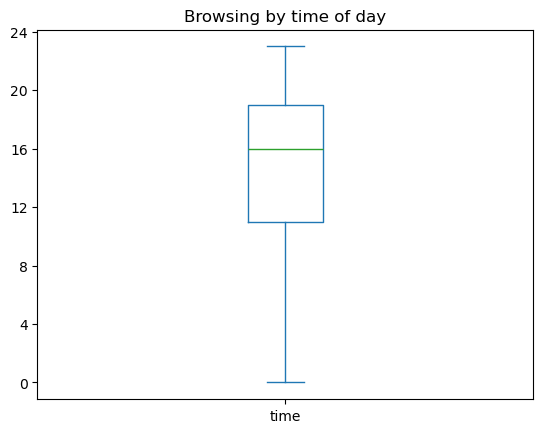

In [455]:
plot = mktplc_df.plot(kind = 'box', title = 'Browsing by time of day', yticks = [0,4,8,12,16,20,24])

Overall, I'm satisfied with my work, but a lot of my time was spent with trial and error, trying to figure out how pandas and dataframes work. A lot of my solutions feel like hacky work-arounds, and there a definitely better, cleaner code solutions than what I had.